MEASURES OF RELATIONSHIP BETWEEN VARIABLES : COVARIANCE & CORRELATION

* COVARIANCE:

Statistics that measure the correlation between two variables (linear correlation).

Covariance might be:

* Positive, the two variables move together
* Negative, the two variables move in opposite direction
* equal to 0, they're independent.

`NB:` Covariance can be umber like 5, 50 or 50.000, the difficult to interpret. That's where the `correlation coefficient` comes into place for a better interpretation.


* CORRELATION:

It adjusts Covariance, so that the relationship between the two variables becomes easy to interpret.

* if corr coef = 1 => the entire variability of une variable is explained by the other. Ex: Size determine the price <=> Big house are expensive.

* if corr coef = -1, perfect negative correlation => (-1, 0) : imperfect negative correlation. Ex: Two companies, A: sells Umbrella and B: sells Ice-cream. When one make profit the other one lose money.

* if corr coef = 0, the two variables are absolutely independent. Ex: Price of coffee in Paris and price of house in L.A. They two variables don't have anything in common.

`NB:` correlation does not imply causation.

* Only a controlled, randomized experiment can give us insights on causation.

* We use correlation to decide what experiment to conduct.

Example: Let's say we work for an e-commerce cpmpany, and they are interested in finding a correlation between page speed ( how fast each web page retain a customer) and how much a customer spends.

We won't use numpy covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small result as there is no real correlation:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set()

import plotly.express as px

In [9]:
def de_mean(x):
    xmean = np.mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n-1)


pageSpeeds =  np.random.normal(3.0, 1.0, 1000)
purchaseAmout = np.random.normal(50.0, 10.0, 1000)

fig = px.scatter(pageSpeeds, purchaseAmout)
fig.show()

In [10]:
covariance(pageSpeeds, purchaseAmout)

0.05712050167465626

Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. Pages that render in less time result in more money spent:

-9.264995974479469

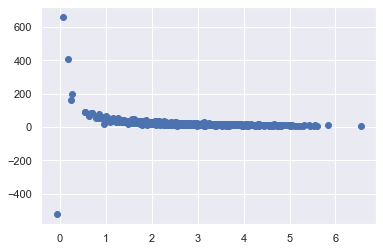

In [11]:
purchaseAmout = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmout)

covariance( pageSpeeds, purchaseAmout)

But what does this value mean? Covariance is sensitive to the unites used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, gicing us an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [12]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x, y) / stddevx / stddevy # in real life we'd check for divide by zero here

correlation(pageSpeeds, purchaseAmout)

-0.3054173873998755

In [13]:
np.corrcoef(pageSpeeds, purchaseAmout)

array([[ 1.        , -0.30511197],
       [-0.30511197,  1.        ]])

Let's force a perfect correlation by fabricating a totally linear relationship

-1.001001001001001

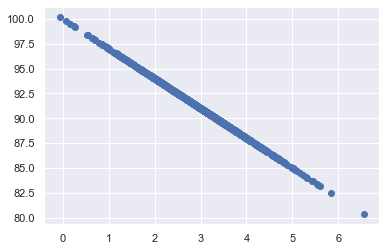

In [14]:
purchaseAmout = 100 - pageSpeeds * 3

plt.scatter(pageSpeeds, purchaseAmout)

correlation(pageSpeeds, purchaseAmout)